In [1]:
import numpy as np
import pandas as pd
import sobol_seq
import matplotlib.pyplot as plt

Problem 1

In [2]:
m_cluster = 250
gamma = 0.2
epsilon = 10**(-3)
delta = 0.01
k_cluster = 10
m = 250
r = 0.95
theta = np.pi/4
k_max = 250
dim = 2

def objective_function(x):
    f1 = np.exp(x[0]-x[1])-np.sin(x[0]+x[1])
    f2 = (x[0]*x[1])**2-np.cos(x[0]+x[1])
    f_list = [f1,f2]
    denom = 0
    for f in f_list:
        denom +=np.abs(f)
    F = 1/(1+denom)
    return F

boundaries = np.array([(-10,10) for _ in range (dim)])

Problem 2

In [3]:
# m_cluster = 2000
# gamma = 0.3
# epsilon = 10**(-3)
# delta = 0.1
# k_cluster = 10
# m = 300
# r = 0.95
# theta = np.pi/4
# k_max = 300
# dim = 2

# def objective_function(x):
#     f1 = 0.5*np.sin(x[0]*x[1])-0.25*x[1]/np.pi - 0.5*x[0]
#     f2 = (1-0.25/np.pi)*(np.exp(2*x[0])-np.exp(1))+np.exp(1)*x[1]/np.pi - 2*np.exp(1)*x[0]
#     f_list = [f1,f2]
#     denom = 0
#     for f in f_list:
#         denom +=np.abs(f)
#     F = 1/(1+denom)
#     return F

# boundaries = np.array([(-1,3),(-17,4)])

Problem 4

In [4]:
# m_cluster = 2000
# gamma = 0.001
# epsilon = 10**(-1)
# delta = 0.5
# k_cluster = 10
# m = 500
# r = 0.95
# theta = np.pi/4
# k_max = 500
# dim = 3

# def objective_function(x):
#     f1 = x[0]*x[1]-(x[0]-2*x[2])*(x[1]-2*x[2])-165
#     f2 = (x[0]*x[1]**3)/12-((x[0]-2*x[2])*(x[1]-2*x[2])**3)/12-9369
#     f3 = (2*(x[1]-x[2])**2*(x[0]-x[2])**2*x[2])/(x[1]+x[0]-2*x[2])-6835
#     f_list = [f1,f2,f3]
#     denom = 1
#     for f in f_list:
#         denom +=np.abs(f)
#     F = 1/denom
#     return F

# boundaries = np.array([(-40,40) for _ in range (dim)])

Problem 5

In [5]:
# m_cluster = 3000
# gamma = 0.1
# epsilon = 5*10**(-2.5)
# delta = 0.01
# k_cluster = 10
# m = 200
# r = 0.95
# theta = np.pi/4
# k_max = 200
# dim = 5

# def objective_function(x):
#     f1 = 2*x[0]+x[1]+x[2]+x[3]+x[4]-6
#     f2 = x[0]+2*x[1]+x[2]+x[3]+x[4]-6
#     f3 = x[0]+x[1]+2*x[2]+x[3]+x[4]-6
#     f4 = x[0]+x[1]+x[2]+2*x[3]+x[4]-6
#     f5 = x[0]*x[1]*x[2]*x[3]*x[4]-1
#     f_list = [f1,f2,f3,f4,f5]
#     denom = 0
#     for f in f_list:
#         denom +=np.abs(f)
#     F = 1/(1+denom)
#     return F

# boundaries = np.array([(-10,10) for _ in range (dim)])

Supercritical Pitchfork Bifurcation

In [6]:
# m_cluster = 300
# gamma = 0.1
# epsilon = 5*10**(-3)
# delta = 0.01
# k_cluster = 10
# m = 200
# r = 0.95
# theta = np.pi/4
# k_max = 200
# dim=1
# boundaries = np.array([(-9,9) for _ in range (1)])
# d_list = np.linspace(boundaries[0][0],boundaries[0][1],31)
# def objective_function(x):
#     f = d_list[-1]*x-x**3
#     f_list = [f]
#     denom = 1
#     for f in f_list:
#         denom +=np.abs(f)
#     F = 1/denom
#     return F
# # rsp.root_SpiralOpt(objective_function,m_cluster,gamma,epsilon,delta,k_cluster,m,r,theta,k_max,dim)

In [7]:
"""GENERATE POINTS USING SOBOL SEQUENCE"""
def generate_points(dim,npoint,low=-10,high=10):
    if type(low) != type(high):
        raise TypeError('The type of "low" and "high" should be the same.')
    if type(low) == int:
        boundaries = [(low,high) for _ in range (dim)]
    elif type(low) == list or type(low) == np.ndarray:
        if len(low) != len(high):
            raise TypeError('The length of "low" and "high" should be the same.')
        else:
            boundaries = [(low[i],high[i]) for i in range (len(low))]

    # Generate Sobol sequence points
    sobol_points = sobol_seq.i4_sobol_generate(dim, npoint)

    # Scale the Sobol points to fit within the specified boundaries
    scaled_points = []
    for i in range(dim):
        a, b = boundaries[i]
        scaled_dim = a + sobol_points[:, i] * (b - a)
        scaled_points.append(scaled_dim)

    # Transpose the scaled points to get points per dimension
    scaled_points = np.array(list(map(list, zip(*scaled_points))))
    return scaled_points

"""MAXIMIZE FUNCTION"""
def maximize(set_of_points):
    z = []
    z_max = 0
    F = objective_function(set_of_points.T)
    for i in range (len(set_of_points)):
        if len(set_of_points.T) == 1: # ini sifat dari numpy python dimana arraynya malah dobel klo ga diginiin
            z.append(objective_function(set_of_points.T)[0,i])
            if z[i]>z_max:
                z_max = z[i]
                idx_max = i
        else:
            z.append(objective_function(set_of_points.T)[i])
            if z[i]>z_max:
                z_max = z[i]
                idx_max = i
    x_max = set_of_points[idx_max]
    return z_max,idx_max,x_max


In [8]:
k=0
iter_points = {}
iter_points[k] = generate_points(dim,m_cluster,boundaries[:,0],boundaries[:,1])
x_prime = maximize(iter_points[0])[-1]
x_prime

array([-6.71875,  0.15625])

In [9]:
z = []
z_max = 0
for i in range (len(iter_points[0])):
    if dim == 1: # ini sifat dari numpy python dimana arraynya malah dobel klo ga diginiin
        z.append(objective_function(iter_points[0].T)[0,i])
        if z[i]>z_max:
            z_max = z[i]
            idx_max = i
    else:
        z.append(objective_function(iter_points[0].T)[i])
        if z[i]>z_max:
            z_max = z[i]
            idx_max = i
x_max = iter_points[0][idx_max]
z_max,idx_max,x_max

(0.7054297771129583, 102, array([-6.71875,  0.15625]))

In [10]:
min_boundaries = 10**100
for i in range (len(boundaries)):
    abs_disc = np.abs(boundaries[i,1]-boundaries[i,0])
    if abs_disc<=min_boundaries:
        min_boundaries = abs_disc
radius = min_boundaries/2
radius

10.0

In [11]:
k = 0
cluster_center,cluster_radius = {},{}
cluster_center[0],cluster_radius[0] = x_prime,radius
print(cluster_center,cluster_radius)

{0: array([-6.71875,  0.15625])} {0: 10.0}


In [12]:
# potential_cluster_center = []
# F = objective_function(iter_points[0].T)
# for i in range (m_cluster):
#     if F[i] > gamma:
#         potential_cluster_center.append(iter_points[0][i])
# len(potential_cluster_center)

In [13]:
"""FUNCTION CLUSTER"""
def function_cluster(y,lendict):
    min_dist_cluster = 10**100
    for ci,cc in cluster_center.items():
        dist = np.linalg.norm(cc-y)
        if dist<=min_dist_cluster:
            xc = cc
            cluster_id = ci
            min_dist_cluster = dist
    xt = (xc + y)/2
    # print(xt,xc,y)
    Fxt = objective_function(xt)
    Fxc = objective_function(xc)
    Fy = objective_function(y)
    # print(Fxt,Fxc,Fy)
    if Fxt < Fy and Fxt < Fxc:
        cluster_center[lendict] = y
        cluster_radius[lendict] = np.linalg.norm(y-xt)
    elif Fxt > Fy and Fxt > Fxc:
        cluster_center[lendict] = y
        cluster_radius[lendict] = np.linalg.norm(y-xt)
        function_cluster(xt,lendict+1)
    elif Fy > Fxc:
        cluster_center[cluster_id] = y

    cluster_radius[cluster_id] =  np.linalg.norm(y-xt)
    # return cluster_center,cluster_radius


In [14]:
# for i in range (len(potential_cluster_center)):
#     print(f'Titik ke-{i}')
#     lendict = len(list(cluster_center.keys()))
#     function_cluster(potential_cluster_center[i],lendict)
#     print(cluster_center,cluster_radius)
#     print('')

In [15]:
import spiralopt as spo

Sn = r*spo.generate_Rn(dim,theta=theta)

while k<k_cluster:
    potential_cluster_center = []
    F = objective_function(iter_points[k].T)
    for i in range (m_cluster):
        if len(iter_points[k].T) == 1:
            fungam = F[0][i]
        else:
            fungam = F[i]
        if fungam > gamma:
            potential_cluster_center.append(iter_points[k][i])
    # len(potential_cluster_center)
    # print('')
    for i in range (len(potential_cluster_center)):
        # print(f'Titik ke-{i}')
        lendict = len(list(cluster_center.keys()))
        function_cluster(potential_cluster_center[i],lendict)
        # print(cluster_center,cluster_radius)
        # print('')
    iter_points[k+1]=spo.update_point(iter_points[k],Sn,dim=len(boundaries),objective_function=objective_function)
    k+=1
cluster_center,cluster_radius

({0: array([-6.71875,  0.15625]),
  1: array([-1.30078125,  0.82421875]),
  2: array([-0.3125,  6.5625]),
  3: array([-0.74414062,  1.15820313]),
  4: array([0.234375, 6.640625]),
  5: array([-0.0390625,  6.6015625]),
  6: array([0.09765625, 6.62109375]),
  7: array([0.36914063, 0.93554688]),
  8: array([0.17578125, 5.29296875]),
  9: array([-3.12285156, -0.05527344]),
  10: array([-0.55859375,  1.86328125]),
  11: array([0.734375  , 0.68554688]),
  12: array([-1.00390625,  0.52734375]),
  13: array([0.24609375, 0.62109375]),
  14: array([-0.3359375,  3.2734375]),
  15: array([-3.38725586e+00, -2.39257813e-03]),
  16: array([0.03515625, 2.90234375]),
  17: array([0.14648438, 2.04882813]),
  18: array([-0.20605469,  1.95605469]),
  19: array([-0.02978516,  2.00244141]),
  20: array([-0.11791992,  1.97924805]),
  21: array([-0.08486938,  1.98794556]),
  22: array([-0.09588623,  1.98504639]),
  23: array([0.88867188, 0.41601563]),
  24: array([-0.96679687, -0.40039063]),
  25: array([-5.5

In [16]:
def cluster_boundaries(center_point,radius):
    return np.array([[center_point[i]-radius,center_point[i]+radius]for i in range (len(center_point))])

In [17]:
roots = []
roots_values = []
for i in range (len(cluster_center)):
    bound = cluster_boundaries(cluster_center[i],cluster_radius[i])
    lp = bound[:,0]
    hp = bound[:,1]
    root,value = spo.SpiralOpt(lp,hp,objective_function,dim=dim,npoint=m,r = r,theta=theta, iter_max=k_max, error_max = 10**(-5),random=0, show_err=False, show_objective_function=False)
    roots.append(root)
    roots_values.append(value)
roots,roots_values

([[-6.656672674453279, 0.14831858727959457],
  [-0.9589305978247163, 1.0410743128670283],
  [-0.15528773088258727, 6.439839302128859],
  [-0.9321160283519141, 1.0678776270017354],
  [0.14764259808777927, 6.520644176116848],
  [0.1633174021182439, 6.1229000785634575],
  [0.14493133180927578, 6.572129368692184],
  [0.43485221950282715, 0.9603962193806436],
  [0.16670462285911938, 5.610939578138676],
  [-3.1817110413387693, -0.0014676136105186911],
  [-0.46828353336980055, 1.5131108373542634],
  [0.6671212598392549, 0.6901045084974029],
  [-1.1268863485642973, 0.8730607104833668],
  [0.6283686024645031, 0.7301404023296069],
  [-0.00306627878787726, 3.09971253966771],
  [-3.216408708705316, 0.036061416704750444],
  [0.04154869504936977, 3.0506653322446526],
  [-0.011573926546033078, 1.8879218730972287],
  [-0.11563687952736819, 1.8656368795273692],
  [-0.05719334309143927, 1.958659421768079],
  [-0.09532030800283255, 1.9566484330028342],
  [-0.0735730305474649, 1.9766492024224667],
  [-0.0

In [18]:
if dim == 1:
    list_criteria = [element for sublist in roots for element in sublist] #convert from 2D array into 1D array
else:
    list_criteria = roots
eligible_roots = np.array([x for x in list_criteria if (1-objective_function(x))<epsilon])
eligible_roots

array([[-0.15528773,  6.4398393 ],
       [-0.93211603,  1.06787763],
       [ 0.1633174 ,  6.12290008],
       [ 0.66712126,  0.69010451],
       [-6.43716217,  0.15534518],
       [-6.11711888, -0.16347392],
       [-6.11710807, -0.16347572]])

In [19]:
duplicated_roots = []
for i in range(len(eligible_roots)):
    for j in range (i+1,len(eligible_roots)):
        if np.linalg.norm(eligible_roots[i]-eligible_roots[j])<delta:
            duplicated_roots.append([eligible_roots[i],eligible_roots[j]])
duplicated_roots = np.unique(duplicated_roots,axis=0)
# print(duplicated_roots)
deselected_duplicated_roots = []
for i in range (len(duplicated_roots)):
    root_a = objective_function(duplicated_roots[i][0])
    root_b = objective_function(duplicated_roots[i][1])
    if dim == 1:
        if root_a>root_b:
            duplicated_root = duplicated_roots[i][1]
        else:
            duplicated_root = duplicated_roots[i][0]
    else:
        if root_a>root_b:
            duplicated_root = list(duplicated_roots[i][1])
        else:
            duplicated_root = list(duplicated_roots[i][0])
    deselected_duplicated_roots.append(duplicated_root)
# print(deselected_duplicated_roots)
if dim == 1:
    # Reshape the 1D array to have one column
    deselected_duplicated_roots = np.array(deselected_duplicated_roots).reshape(-1, 1)

    # Compare the 2D array with the reshaped 1D array
    exclude_condition = np.all(eligible_roots != deselected_duplicated_roots, axis=0)

    # Use the boolean mask to filter eligible_roots
    final_root = eligible_roots[exclude_condition]
else:
    if deselected_duplicated_roots:
        exclude_condition = np.all(eligible_roots != np.array(deselected_duplicated_roots)[:, np.newaxis], axis=2).all(axis=0)
        final_root = eligible_roots[exclude_condition]
    else:
        final_root = eligible_roots

final_root

array([[-0.15528773,  6.4398393 ],
       [-0.93211603,  1.06787763],
       [ 0.1633174 ,  6.12290008],
       [ 0.66712126,  0.69010451],
       [-6.43716217,  0.15534518],
       [-6.11710807, -0.16347572]])

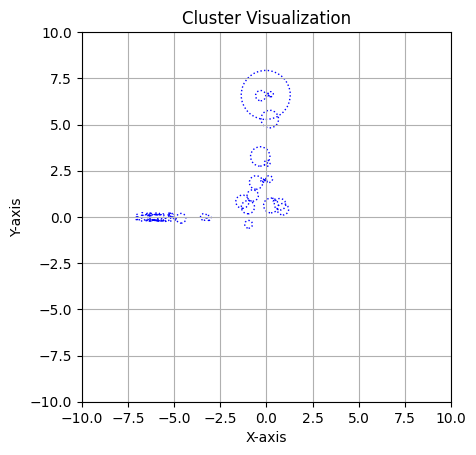

In [20]:
"""Visualization"""
fig, ax = plt.subplots()
for center,radius in zip(cluster_center.values(),cluster_radius.values()):
    circle = plt.Circle(center, radius, fill=False, linestyle='dotted', edgecolor='b')
    ax.add_artist(circle)

# Set axis limits
ax.set_xlim(boundaries[0])
ax.set_ylim(boundaries[1])
# ax.autoscale_view()

# # Add labels (optional)
# for i, center in cluster_center.items():
#     ax.text(center[0], center[1], f'Cluster {i+1}', ha='center', va='bottom')

# Add a title and labels (optional)
ax.set_title('Cluster Visualization')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.gca().set_aspect('equal', adjustable='box')  # Make the aspect ratio equal
plt.grid(True)
plt.show()
